This notebook is to calculate the probability that birth will happen on a specific day, given that it has not happened until that day.

Base probabilities are estimated from the statistics shown on Figure 1a of Okland et al, 2011 (DOI: 10.1002/uog.7728) fitted with Weibull distribution.

The idea is that by each day passing without birth, the next days' probabilities of giving birth are re-estimated using conditional probability. For each day, the probability of giving birth on that day if not before is returned.

In [123]:
import Pkg
Pkg.add("Distributions")
Pkg.add("Plots")
Pkg.add("StatsBase")
using Distributions
using Plots
using StatsBase

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.9/Project.toml`
  [2913bbd2] + StatsBase v0.34.0
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


Figure 1a from Okland et al, 2011
![Image](original_due_delivery.png)

In [117]:
my_model = MixtureModel([
        Normal(22, 10),
        Normal(30, 5),
        Weibull(10, 42),
        Normal(50, 1.75)],
    [0.1, 0.1, 0.7,  0.1])

MixtureModel{Distribution{Univariate, Continuous}}(K = 4)
components[1] (prior = 0.1000): Normal{Float64}(μ=22.0, σ=10.0)
components[2] (prior = 0.1000): Normal{Float64}(μ=30.0, σ=5.0)
components[3] (prior = 0.7000): Weibull{Float64}(α=10.0, θ=42.0)
components[4] (prior = 0.1000): Normal{Float64}(μ=50.0, σ=1.75)


In [118]:
Random.seed!(123);
datapoints = rand(my_model, 10000);

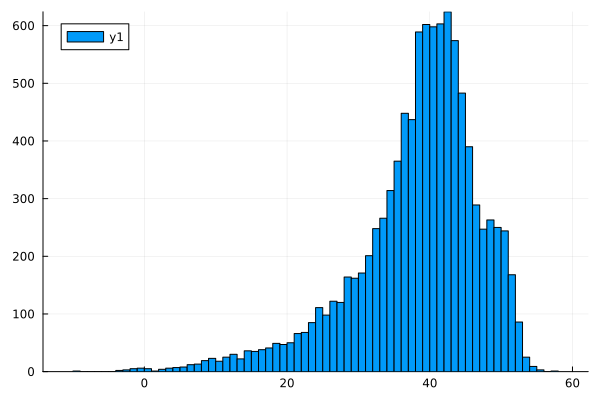

In [119]:
plot(datapoints, seriestype=:hist)

In [120]:
pdf(my_model, 40)

0.06001613621528105

The `datapoints` are used as proxi for a discretized function. The next section rescales the distribution day by day, so that for each "future" the total sums to 1.

In [163]:
day_datapoints = sort([ floor(Int, x) for x in datapoints]);

In [170]:
day_frequencies_0 = countmap(day_datapoints)
day_frequencies_0[40]

598

In [189]:
scale_factor = (10000/(598 + 400 + 200))
sum1 = scale_factor*598
sum2 = scale_factor*400
sum3 = scale_factor*200
println(sum1, ' ',sum2,' ', sum3)
println(sum([sum1, sum2, sum3]))

4991.652754590985 3338.8981636060103 1669.4490818030051
10000.0


In [194]:
function calc_chance_by_day(today, day_datapoints)
    day_datapoints_process = copy(day_datapoints)
    # remove all elements until the current day
    for day in minimum(day_datapoints_process):today-1
        filter!(e->e≠day,day_datapoints_process)
    end
    # count the frequency of the remaining days
    day_frequencies = countmap(day_datapoints_process)
    # normalize to get the probability of giving birth that day
    current_sum = sum(collect(values(day_frequencies)))
    chance_by_day = day_frequencies[today] / current_sum
    return chance_by_day
end

calc_chance_by_day (generic function with 1 method)

Feel free to try out calculating chance by day.

In [200]:
calc_chance_by_day(57, day_datapoints)

1.0

In [206]:
all_days = [calc_chance_by_day(day, day_datapoints) for day in 0:55];
append!(all_days, calc_chance_by_day(57, day_datapoints));

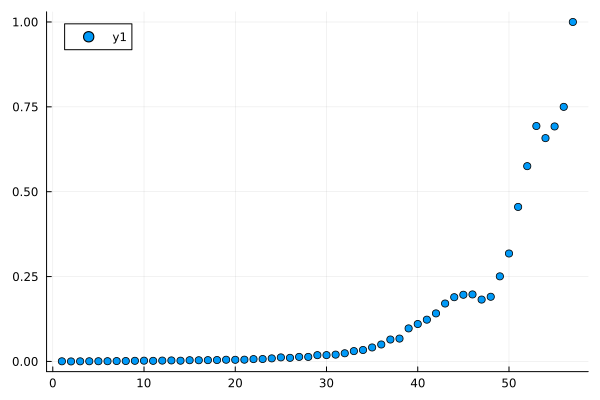

In [208]:
plot(all_days, seriestype=:scatter)